<a href="https://colab.research.google.com/github/bbcx-investments/notebooks/blob/main/bonds/clean_dirty_paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class bond():
    def __init__(self,coupon_rate, coupons_remaining, days_to_next=180) :
        self.coupon = 100*coupon_rate/2
        self.n = coupons_remaining
        self.days = int((coupons_remaining-1)*180 + days_to_next)
        self.days_to_next = days_to_next
    def days_remaining(self, day) :
        return self.days - day
    def coupons_remaining(self, day):
        return int(np.ceil((self.days_remaining(day))/180))
    def fp(self, day):
        x = 180 - self.days_remaining(day)%180
        return x/180 if x<180 else 0
    def accrued(self, day) :
        return self.coupon * self.fp(day)
    def dirty(self, day, yld) :
        periods = 1 - self.fp(day) + np.arange(self.coupons_remaining(day))
        pvFactors = 1 / (1+yld/2)**periods
        cashFlows = [self.coupon]*(self.coupons_remaining(day)-1) + [100+self.coupon]
        return np.sum(pvFactors*cashFlows)
    def clean(self, day, yld) :
        return self.dirty(day,yld) - self.accrued(day)

In [6]:
# Example
face_value = 100
coupon_rate = 0.025      # annual coupon rate
coupons_remaining = 20
days_to_next_coupon = 60
yld = 0.06          # bond yield

b = bond(coupon_rate, coupons_remaining, days_to_next_coupon)

# clean price
print('The clean price for this bond is', b.clean(0,yld).round(2))

The clean price for this bond is 74.6


In [7]:
# dirty price
print('The dirty price for this bond is', b.dirty(0,yld).round(2))

The dirty price for this bond is 75.44


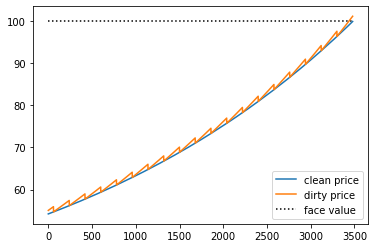

In [8]:
# plot
days = [i for i in range(b.days)]
clean = [b.clean(d,0.1) for d in days]
dirty = [b.dirty(d,0.1) for d in days]
plt.hlines(face_value, 0, days[-1], label = 'face value', linestyles='dotted')
plt.plot(days,clean, label = 'clean price')
plt.plot(days,dirty, label = 'dirty price')
plt.legend(loc = 4)
plt.show()